# **Machine Learning Final Project**


### Ron Keinan 203735857






____________________________________________________________________________________________________________________________________________________________________________________

Notebook # 4 - In this notebook I will classify df with 2 imbalanced classes in the same way of notebook #1, but first will balance the dataset with Random undersampling. now the results should be better than #2.





# **Data preperation**


##### **Downloading the data set**

In [ ]:
import os
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Alignment, Border, Side
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from string import punctuation
import numpy as np
import math
import seaborn as sns

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
%matplotlib inline

import time
t1 = time.perf_counter()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = '/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/'
full_data = pd.read_excel(data_path+'camoni full comments.xlsx')
full_data['Community'].value_counts()

דיכאון וחרדה                62221
הפרעות אכילה                36950
ער"ן - עזרה ראשונה נפשית    35618
טרשת נפוצה                  21422
כאב                         15715
קרוהן וקוליטיס              15179
סוכרת סוג-2                 14715
תרופות ורוקחות              13057
כליות ודיאליזה              10557
חוט שדרה                     6831
נשימה                        5433
קשב וריכוז                   5210
השמנה                        5202
מחלות לב                     5124
אוסטאופורוזיס                4715
לחץ דם                       3922
סרטן                         3501
מפרקים                       3438
גמילה מעישון                 3391
זכויות החולה                 2681
אירוע מוחי                   2475
שלפוחית רגיזה                2258
פסוריאזיס                    2181
סרטן השד                     1765
מיאלומה נפוצה                1705
סיוגרן (sjogren)             1359
מושתלים                       888
בני משפחה מטפלים              851
טראומה מטרור ומלחמה           828
בעיות גדילה   

In [ ]:
data = full_data[full_data['Community'].isin(['הידרדניטיס סופורטיבה', 'סרטן הריאות'])]

In [ ]:
data['Community'] = data['Community'].replace('סרטן הריאות', 'lung cancer')
data['Community'] = data['Community'].replace('הידרדניטיס סופורטיבה','hydradenitis suppurativa')


<ipython-input-5-7af39f4a9cbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Community'] = data['Community'].replace('סרטן הריאות', 'lung cancer')
<ipython-input-5-7af39f4a9cbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Community'] = data['Community'].replace('הידרדניטיס סופורטיבה','hydradenitis suppurativa')


In [ ]:
data

,Date,Time,Community,Comment author,Comment,Post/Comment
117136,20/03/16,12:28,lung cancer,רחלה\n,\nבכימו והקרנות או שיש אפשרויות נוספות? תודה \...,post
117137,21/03/16,10:30,lung cancer,"ד""ר מיה גוטפריד\n",תלוי בשלב המחלה\nישנן אופציות נוספות\n\n,comment
117138,27/03/16,10:44,lung cancer,אפרת_זיו\n,כמו מה\n\n,comment
117139,24/04/16,0:21,lung cancer,"ד""ר טל\n",היי רחלה\nקיימים טיפולים ביולוגים. \n\n\n,comment
117140,20/03/16,12:47,lung cancer,אנונימית\n,\nציספלטין+וינבלסטין למה לצפות? \n\n\n,post
...,...,...,...,...,...,...
287320,31/10/21,8:09,lung cancer,"ד""ר אמיר און\n",לפי התיאור הזה יש רק ממצא אחד – קשרית LUL =LEF...,comment
287321,01/11/21,9:50,lung cancer,רון1504\n,תודה!\nהרדיולוג הרי ראה את ה-CT וזה מה שהוא כת...,comment
287322,02/11/21,10:02,lung cancer,"ד""ר אמיר און\n",קליטה ב PETCT משמעה אזור עם פעילות ביולוגית גב...,comment
287811,02/11/21,12:54,lung cancer,לירן.לוי\n\n,\nמיותר לציין שאני בלחץ מטורף\nאני בן 37 וחי ב...,post


In [ ]:
data['Community'].value_counts()

lung cancer                 472
hydradenitis suppurativa    197
Name: Community, dtype: int64

# Data Exploration

In [ ]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

669
['Date', 'Time', 'Community', 'Comment author', 'Comment', 'Post/Comment']
Date              object
Time              object
Community         object
Comment author    object
Comment           object
Post/Comment      object
dtype: object


In [ ]:
data['Community'].value_counts()

lung cancer                 472
hydradenitis suppurativa    197
Name: Community, dtype: int64

In [ ]:
data.groupby('Community').describe()

Date                        Time                     \
                         count unique       top freq count unique    top freq   
Community                                                                       
hydradenitis suppurativa   197    131  18/02/20    6   197    181  11:13    2   
lung cancer                472    285  14/02/17    8   472    354  10:31    5   

                         Comment author                                 \
                                  count unique                top freq   
Community                                                                
hydradenitis suppurativa            197     87  ד"ר אריאלה הפנר\n   33   
lung cancer                         472    194     ד"ר אמיר און\n  104   

                         Comment         \
                           count unique   
Community                                 
hydradenitis suppurativa     197    196   
lung cancer                  472    469   

                                                                             \
                                                                        top   
Community                                                                     
hydradenitis suppurativa  שלום לך דייב! הנה מוזמן לקרוא על כך בפירוט בקי...   
lung cancer                                                          \n\n\n   

                              Post/Comment                       
                         freq        count unique      top freq  
Community                                                        
hydradenitis suppurativa    2          197      2  comment  123  
lung cancer                 2          472      2  comment  297

Text(0, 0.5, 'feature amount')

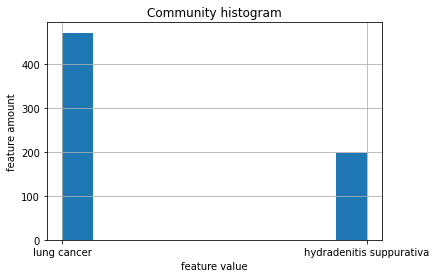

In [ ]:
hist1=data['Community'].hist()
hist1.set_title('Community histogram')
hist1.set_xlabel("feature value")
hist1.set_ylabel("feature amount")

In [ ]:
import plotly.express as px
fig = px.pie(data, names='Community', title ='Pie chart of different communities of posts')
fig.show()

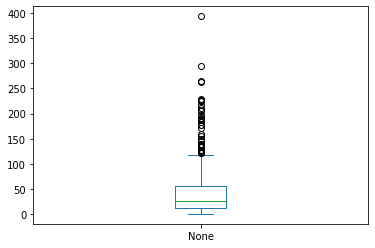

In [ ]:
# Calculate post lengths
post_len = pd.Series([len(post.split()) for post in data['Comment']])

# The distribution of tweet text lengths
post_len.plot(kind='box')

<ipython-input-14-c360206ecba6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



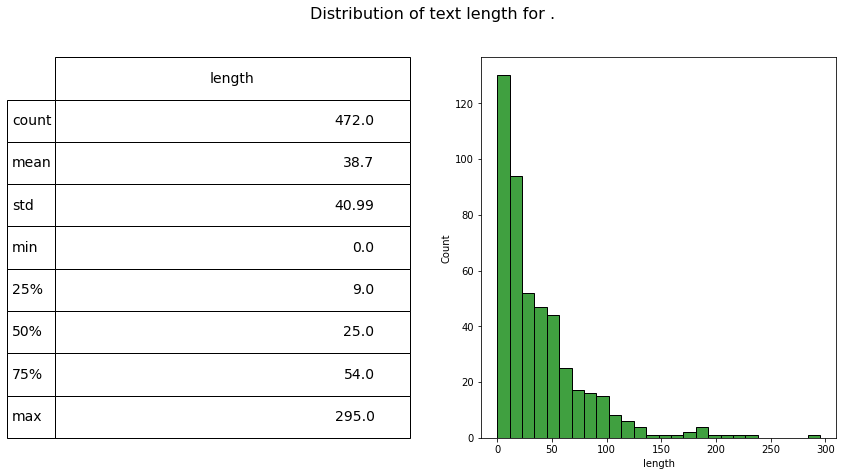

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='lung cancer']['length'], ax=ax1,color='green')
describe = data.length[data.Community=='lung cancer'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)

plt.show()

<ipython-input-15-13485b6e8adc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



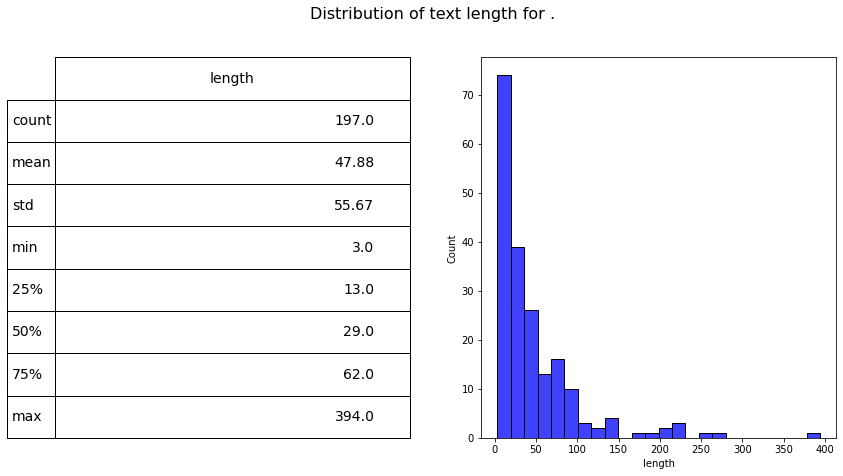

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='hydradenitis suppurativa']['length'], ax=ax1,color='blue')
describe = data.length[data.Community=='hydradenitis suppurativa'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)

plt.show()

# Pie

In [ ]:
import plotly.express as px
fig = px.pie(data, names='Community', title ='Pie chart of different communities of posts')
fig.show()

# Data Classification - basic model



In [ ]:
data_for_basic = data.copy()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['Date', 'Time', 'Community', 'Comment author', 'Comment', 'Post/Comment']:
    data_for_basic[col] = lb.fit_transform(data_for_basic[col])

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data_for_basic = pd.DataFrame(msc.fit_transform(data_for_basic),  # this is an np.array, not a dataframe.
                    columns=data_for_basic.columns)

In [ ]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data_for_basic.columns if x != 'Community']

# Split the data into two dataframes
X_data = data_for_basic[x_cols]
y_data = data_for_basic['Community']

In [ ]:
# RK - let's check in a simple way, how much accurate is the KNN model:

def calc_acc(y_data, y_pred):
  different = 0
  for i in range(len(y_data)):
    if y_data.values[i] != y_pred[i]:
      different += 1

  print("Number of mistakes: ", different)
  mistake_per = (different/len(y_data))*100
  print("Percent of mistakes: ", mistake_per,"%")
  print("Accuracy: ", 100-mistake_per,"%")


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
calc_acc(y_data, y_pred)

Number of mistakes:  175
Percent of mistakes:  26.15844544095665 %
Accuracy:  73.84155455904335 %


In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_data, y_data)
y_pred = lr.predict(X_data)
calc_acc(y_data, y_pred)

Number of mistakes:  196
Percent of mistakes:  29.297458893871447 %
Accuracy:  70.70254110612855 %


# Data Pre processing

In [ ]:
STOP_WORDS = open('/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/heb_stopwords.txt', "r")
STOP_WORDS = STOP_WORDS.read()
STOP_WORDS = STOP_WORDS.split("\n")
print(STOP_WORDS[:10])

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם']


In [ ]:
import re
def pre_process_text(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # remove stop words
    text_ = [word for word in text.split() if word not in STOP_WORDS]

    # remove not hebrew letters
    my_word = re.sub(r'[^אבגדהוזחטיכלמנסעפצקרשתםןץףך]{3,}', ' ', ' '.join(text_))
    my_word2 = re.sub(r'(\s)([אבגדהוזחטיכלמנסעפצקרשתםןץףך])(\s)', ' ', my_word)

    return my_word2

In [ ]:
basic_texts = data['Comment']
labels = data['Community']

In [ ]:
basic_texts[:10]

117136    \nבכימו והקרנות או שיש אפשרויות נוספות? תודה \...
117137             תלוי בשלב המחלה\nישנן אופציות נוספות\n\n
117138                                           כמו מה\n\n
117139            היי רחלה\nקיימים טיפולים ביולוגים. \n\n\n
117140               \nציספלטין+וינבלסטין למה לצפות? \n\n\n
117141     מה השאלה\nבאיזה שלב\nהאם את בטוחה שזה השילוב\n\n
117214    \nבבקשה לא להתנפל אבל אם אני כבר חולה כמה מזיק...
117215                                             מזיק\n\n
117216    \nשלום רב,\nאבי אובחן כחולה סרטן ריאה אדנוקרצי...
117217           מתאים לטיפול ביולוגי בתנאי שמפסיק לעשן\n\n
Name: Comment, dtype: object

In [ ]:
clean_texts = []
for text in basic_texts:
    clean_txt = pre_process_text(text)
    clean_texts.append(clean_txt)  # create pre-processed text list
# add to dataframe column with the clean text


In [ ]:
clean_texts[:10]

['בכימו והקרנות אפשרויות נוספות',
 'תלוי המחלה ישנן אופציות נוספות',
 '',
 'היי רחלה קיימים טיפולים ביולוגים',
 'ציספלטיןוינבלסטין לצפות',
 'השאלה באיזה שלב בטוחה השילוב',
 'להתנפל חולה מזיק להמשיך לעשן ושם',
 'מזיק',
 'רב אבי אובחן כחולה סרטן ריאה אדנוקרצינומה גרורות בכבד נמצאה מוטציה קיבל טיפולי כימותרפיה וצפוי לעבור כ4 טיפולים אבי הינו מעשן כבד מצליח ולהיגמל מעישון שאלתי מניעה מלנסות להיגמל בעזרת תרופות זייבן צמפקיס העישון במהלך תקופת הטיפולים הכימותרפיים מפחית מיעילותם',
 'מתאים לטיפול ביולוגי בתנאי שמפסיק לעשן']

# Data Preperation - tf-idf model

TF-IDF (term frequency-inverse document frequency) is a method used to quantify the importance of a word in a document within a collection of documents. It is commonly used in text classification and information retrieval tasks.

In the TF-IDF method, the importance of a word in a document is determined by two factors: its term frequency (TF) and its inverse document frequency (IDF). TF is the number of times a word appears in a document, and IDF is the logarithmically scaled inverse fraction of the documents that contain the word. The product of TF and IDF is the TF-IDF weight of a word in a document.

Once the TF-IDF weights of all the words in a document have been calculated, they can be used as features in a machine learning classifier. Classic machine learning classifiers such as Naive Bayes, SVM, decision trees, etc. can then be trained on these features to classify texts into different categories.

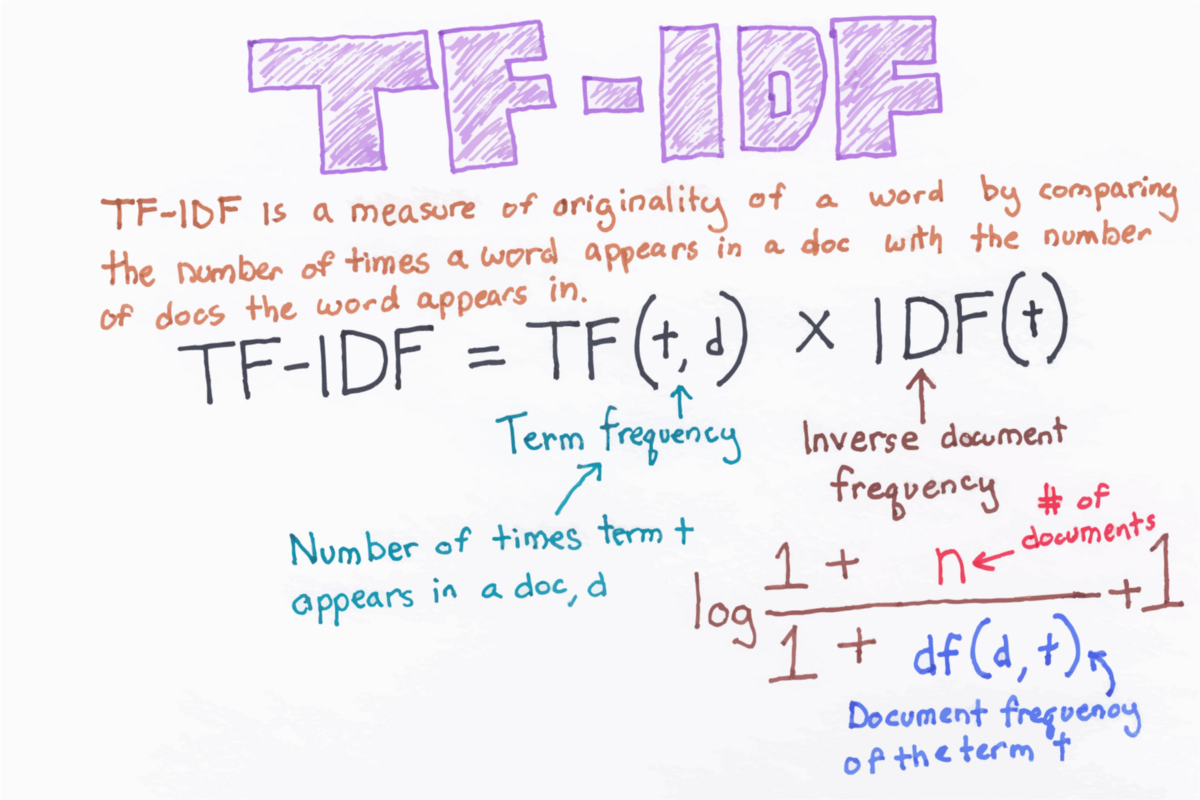

In [ ]:
ANALYZER_SIZE_LIST = [['word', 1],
                      ['word', 2], 
                      ['word', 3], 
                      #['char', 3],
                      #['char', 6],
                      #['char', 9]
                      ]

ROUND_DIGITS = 4

texts = clean_texts
number_of_texts = len(texts)
united_texts = '\n'.join(texts)
min_df=0
df_dict = {}
for analyzer, ngram_range in ANALYZER_SIZE_LIST:
    if analyzer == 'word':
        if ngram_range == 1:
            words = united_texts.split()
        else:
          words = []
          for text in texts:
            words.extend(CountVectorizer(ngram_range=(ngram_range,ngram_range)).build_analyzer()(text))
            
    elif analyzer == 'char':
        words = []
        for post in united_texts.split('\n'):
            for i in range(len(post) - ngram_range + 1):
                words.append(post[i:i + ngram_range])

    number_of_words = len(words)
    words_list = list(set(words))
    # remove empty strings from the list
    words_list = [word for word in words_list if word != '']

    new_df = pd.DataFrame(
        columns=['term', 'texts_number', 'number_in_dataset', 'tf', 'idf', 'tf-idf'])
    for word in words_list:
        number_of_texts_with_word = 0
        for text in texts:
            if word in text:
                number_of_texts_with_word += 1

        number_of_word_in_dataset = words.count(word)

        if number_of_texts_with_word >= min_df and number_of_word_in_dataset >= min_df:
            tf = number_of_word_in_dataset / number_of_words
            idf = number_of_texts / (number_of_texts_with_word + 1)
            idf = math.log(idf)
            tf_idf = tf * idf
            new_df = new_df.append(
                {'term': word,  'texts_number': number_of_texts_with_word,
                 'number_in_dataset': number_of_word_in_dataset,
                 'tf': round(tf, ROUND_DIGITS), 'idf': round(idf, ROUND_DIGITS),
                 'tf-idf': round(tf_idf, ROUND_DIGITS)}, ignore_index=True)

    df_dict[analyzer + '_' + str(ngram_range)] = new_df.sort_values(by='tf-idf', ascending=False)
    print('finished calc', analyzer, ngram_range)

finished calc word 1
finished calc word 2
finished calc word 3


In [ ]:
df_dict['word_1']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
1251,טיפול,193,139,0.0083,1.2379,0.0102
177,סרטן,88,80,0.0048,2.0171,0.0096
5743,המחלה,58,66,0.0039,2.4282,0.0095
1985,ריאות,129,88,0.0052,1.6382,0.0086
891,הטיפול,73,66,0.0039,2.2017,0.0086
...,...,...,...,...,...,...
6655,בים,69,1,0.0001,2.2573,0.0001
3374,חלה,98,1,0.0001,1.9107,0.0001
2885,ול,430,1,0.0001,0.4397,0.0000
2431,כ,464,1,0.0001,0.3637,0.0000


In [ ]:
df_dict['word_2']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
6738,סרטן ריאות,33,25,0.0015,2.9794,0.0046
10095,קליטה פתולוגית,5,12,0.0007,4.7140,0.0035
13508,דר הפנר,18,14,0.0009,3.5613,0.0031
185,בגודל סמ,9,11,0.0007,4.2032,0.0029
11863,לפנות לרופא,13,12,0.0007,3.8667,0.0029
...,...,...,...,...,...,...
4684,דר מאיה,2,1,0.0001,5.4072,0.0003
6726,התפרצות המחלה,2,1,0.0001,5.4072,0.0003
4711,תור אצל,3,1,0.0001,5.1195,0.0003
12072,שינויים פיברוטיים,2,1,0.0001,5.4072,0.0003


In [ ]:
df_dict['word_3']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
8321,דר אמיר און,8,8,0.0005,4.3086,0.0022
14218,הסרת שיער בלייזר,2,5,0.0003,5.4072,0.0017
11774,האגודה למלחמה בסרטן,3,5,0.0003,5.1195,0.0016
12994,לייזר להסרת שיער,3,4,0.0003,5.1195,0.0013
8264,אצל דר הפנר,5,4,0.0003,4.7140,0.0012
...,...,...,...,...,...,...
702,רופא שמתמחה במחלה,2,1,0.0001,5.4072,0.0003
14226,רופאת העור ראתה,2,1,0.0001,5.4072,0.0003
519,דר חמאיסי ברמבם,2,1,0.0001,5.4072,0.0003
1033,מבנה צנרת הנשימה,2,1,0.0001,5.4072,0.0003


# Feature selection - tf-idf model

### Run for all features

In [ ]:
TERM_NUMBER_LIST = [500, 1000, 2000, 3000, 4000, 6000, 8000, 10000]

CLASSIFIERS = {'KNN': KNeighborsClassifier(),
               'Logistic Regression': LogisticRegression(),
               'Multinomial Naive Bayes': MultinomialNB(),

               'Support Vector Machine': SVC(),
               'Desicion Tree': DecisionTreeClassifier(),

                # Bagging
               'Bagging Classifier DT - Random Forest': RandomForestClassifier(),
               'Bagging Classifier SVM': BaggingClassifier(base_estimator = SVC()),
               'Bagging Classifier LR': BaggingClassifier(base_estimator = LogisticRegression()),

               # Boosting
               'Gradient Boosting DT': GradientBoostingClassifier(),
               'Ada Boost DT': AdaBoostClassifier(),
               'Ada Boost SVM': AdaBoostClassifier(base_estimator = SVC(), algorithm='SAMME'),
               'Ada Boost LR': AdaBoostClassifier(base_estimator = LogisticRegression()),

                # Stacking
                'Stacking LR+SVC+DT+MNB': VotingClassifier(estimators = [('LR', LogisticRegression()),
                                                           ('SVC', SVC()),
                                                           ('DT', DecisionTreeClassifier()),
                                                           ('MNB', MultinomialNB())
                                                           ]),
               # Deep Learning
               'Multi-layer Perceptron': MLPClassifier(),
               }


MIN_NUMBER_OF_TEXTS = 3

In [ ]:
def TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size, min_text_number):
    term_number_list = [str(term) for term in TERM_NUMBER_LIST]
    model_results_dict_accuracy = {'term type': str(size) + " - " + analyze_type,
                             'model': model_name, 'measure': 'accuracy',
                             **dict.fromkeys(term_number_list, 0)}

    for terms_number in TERM_NUMBER_LIST:
        vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
        response = vectorizer.fit_transform(texts)
        X, y = RandomUnderSampler().fit_resample(response, labels)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        # train the classifier
        model.fit(X_train, y_train)
        # predict the response for new texts
        predictions = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='macro')

        model_results_dict_accuracy[str(terms_number)] = round(accuracy, 8)

    return model_results_dict_accuracy

In [ ]:
term_number_list = [str(term) for term in TERM_NUMBER_LIST]
model_results_df = pd.DataFrame(
        columns=['term type', 'model', 'measure', *term_number_list])

for analyze_type, size in ANALYZER_SIZE_LIST:
    for model_name, model in CLASSIFIERS.items():
        measuers_list = TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS)
        model_results_df = model_results_df.append(measuers_list, ignore_index=True)
        print("finished model: " + model_name + " analyzer: " + analyze_type + " " + str(
                    size) + " min text number: " + str(MIN_NUMBER_OF_TEXTS))

# create a new Excel file and add a sheet for each ngram with the results for each model
file_name = ' models results - ' + 'with min text number ' + str(MIN_NUMBER_OF_TEXTS) + '.xlsx'



finished model: KNN analyzer: word 1 min text number: 3
finished model: Logistic Regression analyzer: word 1 min text number: 3
finished model: Multinomial Naive Bayes analyzer: word 1 min text number: 3
finished model: Support Vector Machine analyzer: word 1 min text number: 3
finished model: Desicion Tree analyzer: word 1 min text number: 3
finished model: Bagging Classifier DT - Random Forest analyzer: word 1 min text number: 3
finished model: Bagging Classifier SVM analyzer: word 1 min text number: 3
finished model: Bagging Classifier LR analyzer: word 1 min text number: 3
finished model: Gradient Boosting DT analyzer: word 1 min text number: 3
finished model: Ada Boost DT analyzer: word 1 min text number: 3
finished model: Ada Boost SVM analyzer: word 1 min text number: 3
finished model: Ada Boost LR analyzer: word 1 min text number: 3
finished model: Stacking LR+SVC+DT+MNB analyzer: word 1 min text number: 3
finished model: Multi-layer Perceptron analyzer: word 1 min text number:

In [ ]:
model_results_df

,term type,model,measure,500,1000,2000,3000,4000,6000,8000,10000
0,1 - word,KNN,accuracy,0.444444,0.393939,0.444444,0.515152,0.404040,0.434343,0.424242,0.424242
1,1 - word,Logistic Regression,accuracy,0.818182,0.818182,0.828283,0.818182,0.838384,0.818182,0.818182,0.777778
2,1 - word,Multinomial Naive Bayes,accuracy,0.878788,0.858586,0.888889,0.888889,0.878788,0.868687,0.878788,0.909091
3,1 - word,Support Vector Machine,accuracy,0.767677,0.808081,0.878788,0.828283,0.797980,0.828283,0.858586,0.767677
4,1 - word,Desicion Tree,accuracy,0.777778,0.757576,0.707071,0.696970,0.717172,0.646465,0.727273,0.727273
5,1 - word,Bagging Classifier DT - Random Forest,accuracy,0.777778,0.737374,0.757576,0.767677,0.777778,0.757576,0.818182,0.777778
6,1 - word,Bagging Classifier SVM,accuracy,0.787879,0.868687,0.818182,0.808081,0.808081,0.808081,0.848485,0.787879
7,1 - word,Bagging Classifier LR,accuracy,0.797980,0.787879,0.808081,0.818182,0.818182,0.818182,0.818182,0.818182
8,1 - word,Gradient Boosting DT,accuracy,0.686869,0.747475,0.767677,0.737374,0.797980,0.727273,0.767677,0.747475
9,1 - word,Ada Boost DT,accuracy,0.777778,0.717172,0.707071,0.696970,0.717172,0.707071,0.747475,0.707071


### Choose best max features for every row (analyzer and classifier)

In [ ]:
df = model_results_df
columns_of_results = len(TERM_NUMBER_LIST)
# select the last 4 columns
last_4_cols = model_results_df.iloc[:, -1*columns_of_results:]

# find the column name of the max value in each row
max_col = last_4_cols.idxmax(axis=1)

# find the max value in each row
max_val = last_4_cols.max(axis=1)

# create a new dataframe with all columns except the last 4
new_model_results_df = model_results_df.iloc[:, :-1*columns_of_results]

# add the max value and column name as new columns
new_model_results_df['max measure'] = max_val
new_model_results_df['max features'] = max_col

In [ ]:
new_model_results_df.sort_values(by='max measure', ascending=False)

,term type,model,measure,max measure,max features
41,3 - word,Multi-layer Perceptron,accuracy,0.909091,10000
2,1 - word,Multinomial Naive Bayes,accuracy,0.909091,10000
30,3 - word,Multinomial Naive Bayes,accuracy,0.909091,2000
16,2 - word,Multinomial Naive Bayes,accuracy,0.909091,2000
27,2 - word,Multi-layer Perceptron,accuracy,0.898990,10000
26,2 - word,Stacking LR+SVC+DT+MNB,accuracy,0.898990,3000
34,3 - word,Bagging Classifier SVM,accuracy,0.888889,10000
3,1 - word,Support Vector Machine,accuracy,0.878788,2000
6,1 - word,Bagging Classifier SVM,accuracy,0.868687,1000
40,3 - word,Stacking LR+SVC+DT+MNB,accuracy,0.858586,4000


# Parameter Tuning for the best models - tf-idf model

In [ ]:
def get_best_parameters(classifier, X_train, y_train):
    # create a dictionary with the parameters to test
    classifier_name = classifier.__class__.__name__
    parameters={}
    if classifier_name == 'LogisticRegression':
        parameters = {'C': [0.1, 1, 10],
                      'penalty': ['l1', 'l2', 'elasticnet'],
                      'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'SVC':
        parameters = {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                      'gamma': ['scale', 'auto'],
                      'degree': [1,2,3],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'RandomForestClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                    }                 
    elif classifier_name == 'MLPClassifier':
        parameters = {'hidden_layer_sizes': [(1,), (10,), (100,)],
                      'activation': ['logistic', 'tanh', 'relu'],
                      'solver': ['lbfgs', 'sgd', 'adam'],
                      'alpha': [0.001, 0.01],
                      'max_iter': [1000],
                      'early_stopping': [True]
                      }
    elif classifier_name == 'KNeighborsClassifier':
        parameters = {'n_neighbors': [1, 11, 101],
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      }
    elif classifier_name == 'DecisionTreeClassifier':
        parameters = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                      }
    elif classifier_name == 'MultinomialNB':
        parameters = {'alpha': [0.01, 0.1, 1, 10],
                      'fit_prior': [True, False]
                      }
    elif classifier_name == 'AdaBoostClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'learning_rate': [0.01, 0.1]
                      }
    elif classifier_name == 'BaggingClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'max_samples': [None, 0.5, 0.7],
                      'max_features': [None, 0.5, 0.7],
                      'n_jobs': [-1]
                      }
    elif classifier_name == 'GradientBoostingClassifier':
        parameters = { 'loss': ['log_loss', 'deviance', 'exponential'],
                'learning_rate': [0.001, 0.1],
                "max_features":["log2","sqrt"],
                "n_estimators":[50, 100, 200]}
    elif classifier_name =='VotingClassifier':
      parameters = { 'voting': ['hard', 'soft'],
                     'n_jobs': [-1]       
                    }
                
    # create a grid search object and fit it to the data
    grid_obj = GridSearchCV(estimator=classifier, 
                            param_grid=parameters, 
                            scoring='accuracy',
                            cv=5, 
                            verbose=2, 
                            n_jobs = -1
                            )
    grid_obj = grid_obj.fit(X_train, y_train)

    # return best parameters
    return grid_obj.best_params_, grid_obj.best_estimator_

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': round(accuracy_score(y_true, y_pred), 4),
                      'precision': round(precision_score(y_true, y_pred, average = 'weighted'), 4),
                      'recall': round(recall_score(y_true, y_pred, average = 'weighted'), 4),
                      'f1': round(f1_score(y_true, y_pred, average = 'weighted'), 4)},
                      name=label)

In [ ]:
def TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size, min_text_number, terms_number):
    vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
    response = vectorizer.fit_transform(texts)

    best_params, best_classifier = get_best_parameters(model, response, labels)

    X, y = RandomUnderSampler().fit_resample(response, labels)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model.fit(X_train, y_train)
    y_train_pred_gr = best_classifier.predict(X_train)
    y_test_pred_gr = best_classifier.predict(X_test)

    from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_test_pred_gr, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    measures1 = measure_error(y_train, y_train_pred_gr, 'train')
    measures2 = measure_error(y_test, y_test_pred_gr, 'test')

    
    return best_params, measures1, measures2, cm, disp, model

In [ ]:
best_params_list = []
best_accuracy_train  = []
best_accuracy_test = []
best_precision_train = []
best_precision_test  = []
best_recall_train = []
best_recall_test = []
best_f1_train  = []
best_f1_test = []
conf_matrices = []
conf_matrices_display = []
models = []

for index, row in new_model_results_df.iterrows():
  
    model_name = row['model']
    model = CLASSIFIERS[model_name]
    term_type = row['term type'].split(" - ")

    analyze_type = term_type[1]
    size = int(term_type[0])
    terms_number = int(row['max features'])

    print(model_name)

    best_params, measures_train, measures_test, cm, disp, model = TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS, terms_number)
    best_params_list.append(best_params)
    best_accuracy_train.append(measures_train['accuracy'])
    best_accuracy_test.append(measures_test['accuracy'])
    best_precision_train.append(measures_train['precision'])
    best_precision_test.append(measures_test['precision'])
    best_recall_train.append(measures_train['recall'])
    best_recall_test.append(measures_test['recall'])
    best_f1_train.append(measures_train['f1'])
    best_f1_test.append(measures_test['f1'])
    conf_matrices.append(cm)
    conf_matrices_display.append(disp)
    models.append(model)


new_model_results_df['best params'] = best_params_list
new_model_results_df['best accuracy train'] = best_accuracy_train
new_model_results_df['best accuracy test'] = best_accuracy_test
new_model_results_df['best precision train'] = best_precision_train
new_model_results_df['best precision test'] = best_precision_test
new_model_results_df['best recall train'] = best_recall_train
new_model_results_df['best recall test'] = best_recall_test
new_model_results_df['best f1 train'] = best_f1_train
new_model_results_df['best f1 test'] = best_f1_test
new_model_results_df['conf matrices'] = conf_matrices
new_model_results_df['conf matrices display'] = conf_matrices_display
new_model_results_df['model'] = models

KNN
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Multinomial Naive Bayes
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Support Vector Machine
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Desicion Tree
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Bagging Classifier DT - Random Forest
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Bagging Classifier SVM
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Bagging Classifier LR
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting DT
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Ada Boost DT
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Ada Boost SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Ada Boost LR
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Stacking LR+SVC+DT+MNB
Fitting 5 f

In [ ]:
new_model_results_df.drop('conf matrices', axis=1).drop('conf matrices display', axis=1).drop('model', axis=1)

,term type,measure,max measure,max features,best params,best accuracy train,best accuracy test,best precision train,best precision test,best recall train,best recall test,best f1 train,best f1 test
0,1 - word,accuracy,0.515152,3000,"{'algorithm': 'auto', 'n_neighbors': 101, 'wei...",0.5932,0.5152,0.7707,0.7737,0.5932,0.5152,0.4974,0.4270
1,1 - word,accuracy,0.838384,4000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9898,0.9899,0.9900,0.9901,0.9898,0.9899,0.9898,0.9899
2,1 - word,accuracy,0.909091,10000,"{'alpha': 0.1, 'fit_prior': True}",0.9831,0.9798,0.9836,0.9807,0.9831,0.9798,0.9830,0.9799
3,1 - word,accuracy,0.878788,2000,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.9729,0.9798,0.9742,0.9807,0.9729,0.9798,0.9728,0.9799
4,1 - word,accuracy,0.777778,500,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.9627,0.9293,0.9652,0.9348,0.9627,0.9293,0.9626,0.9297
5,1 - word,accuracy,0.818182,8000,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9898,0.9899,0.9900,0.9901,0.9898,0.9899,0.9898,0.9899
6,1 - word,accuracy,0.868687,1000,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...",0.8949,0.8081,0.9124,0.8679,0.8949,0.8081,0.8932,0.8066
7,1 - word,accuracy,0.818182,3000,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...",0.6034,0.4848,0.7740,0.7674,0.6034,0.4848,0.5154,0.3736
8,1 - word,accuracy,0.797980,4000,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.9017,0.8687,0.9172,0.8997,0.9017,0.8687,0.9002,0.8690
9,1 - word,accuracy,0.777778,500,"{'learning_rate': 0.1, 'n_estimators': 100}",0.8712,0.8081,0.8965,0.8679,0.8712,0.8081,0.8681,0.8066


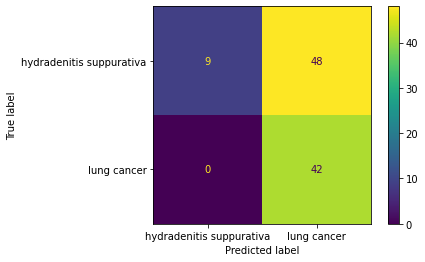

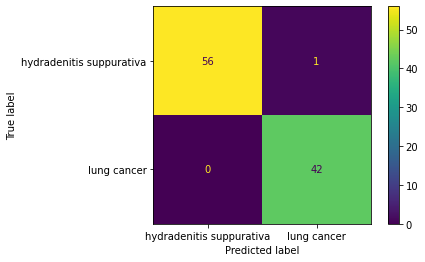

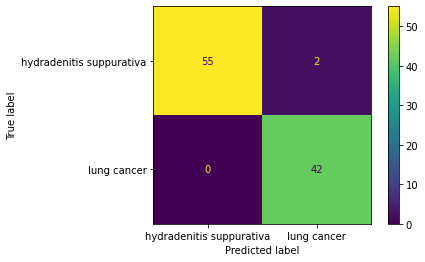

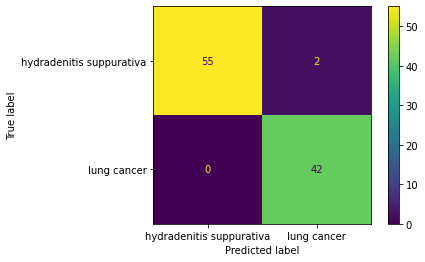

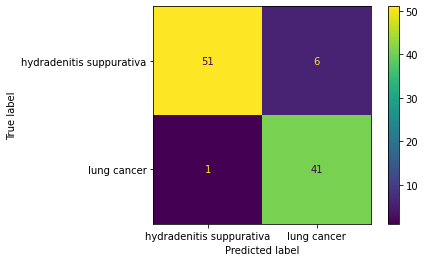

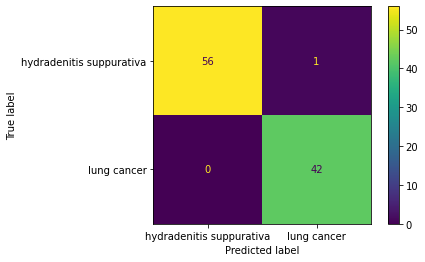

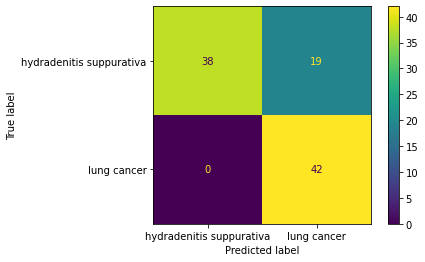

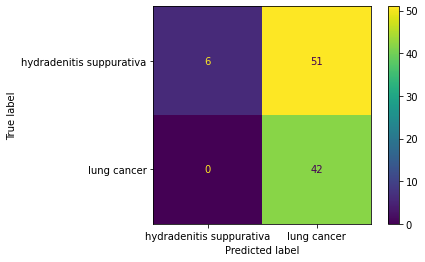

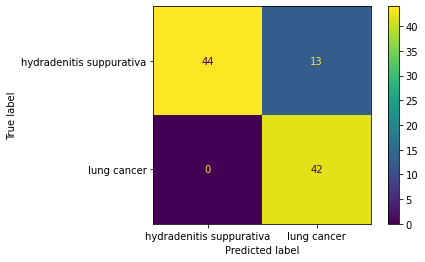

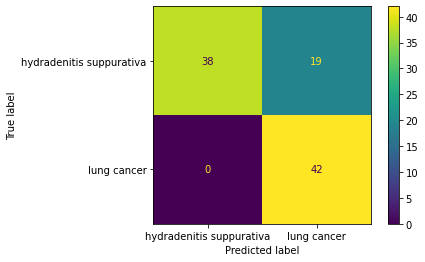

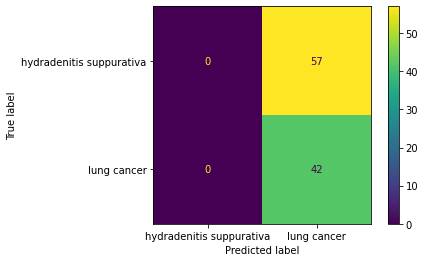

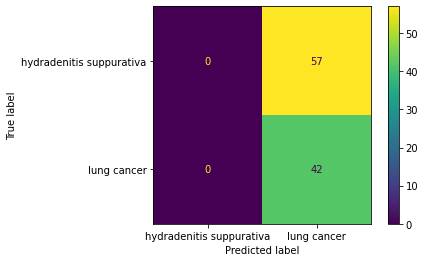

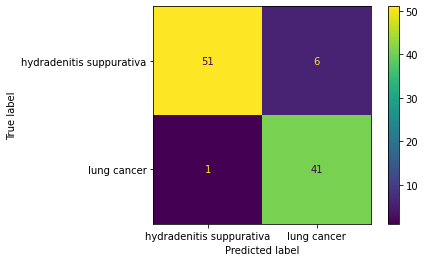

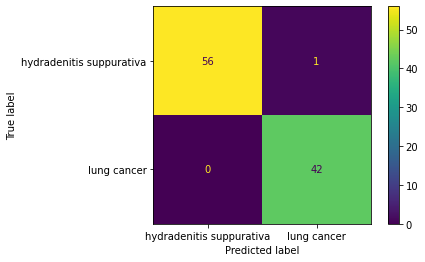

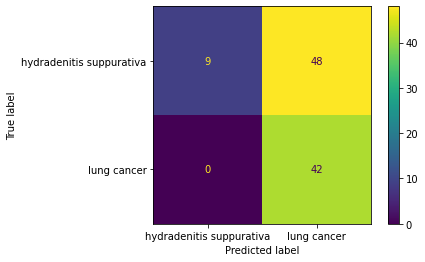

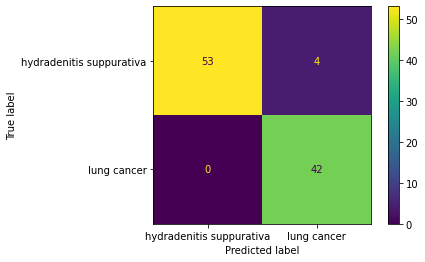

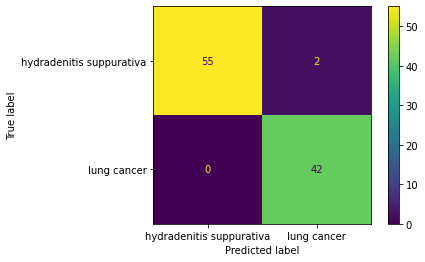

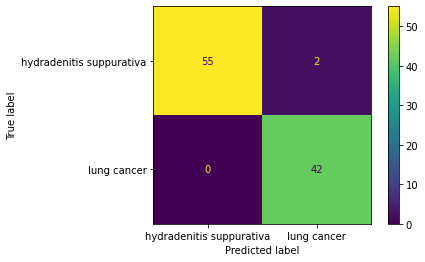

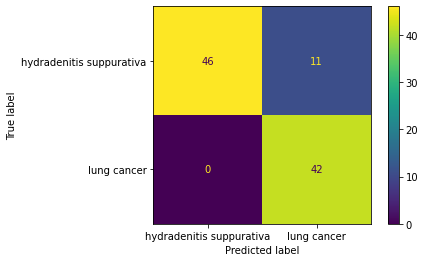

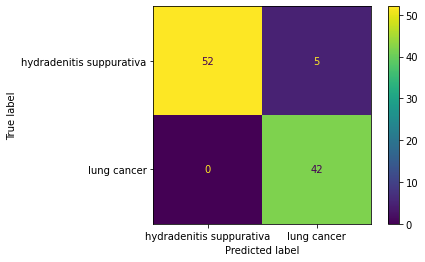

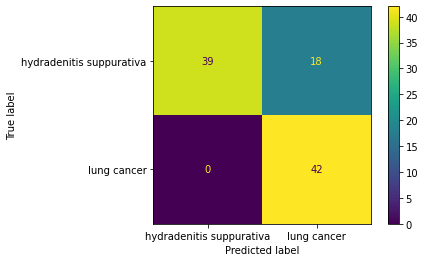

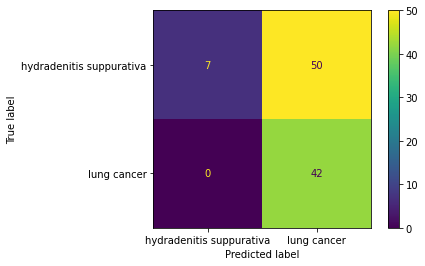

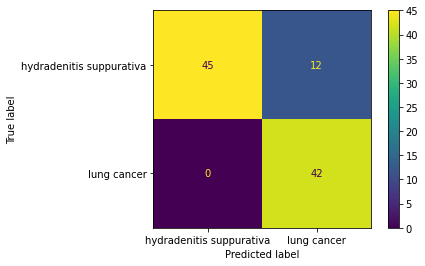

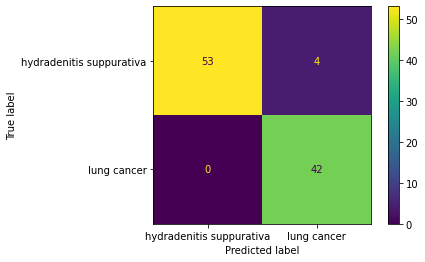

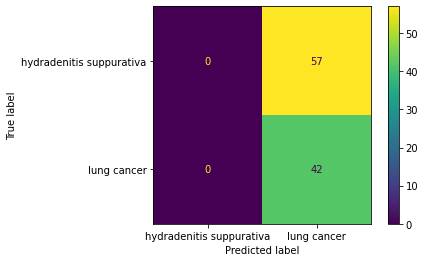

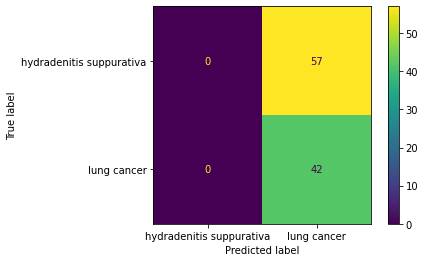

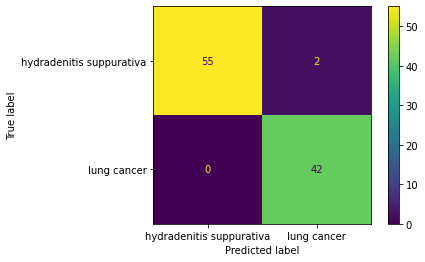

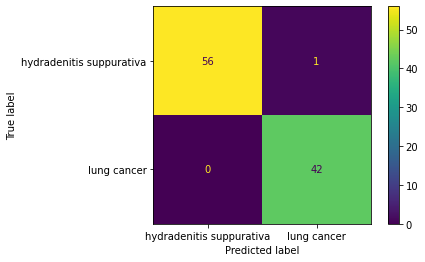

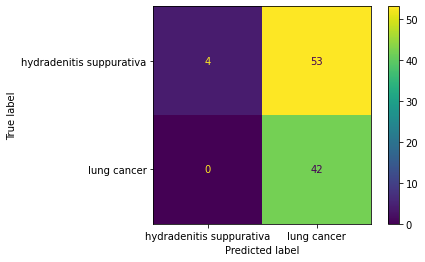

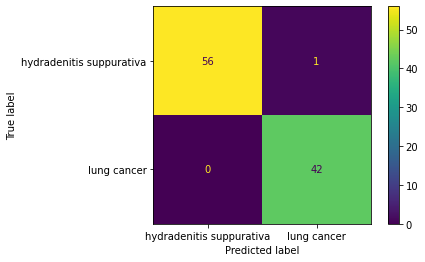

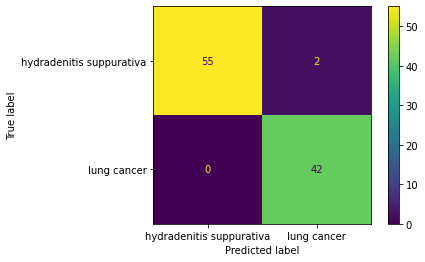

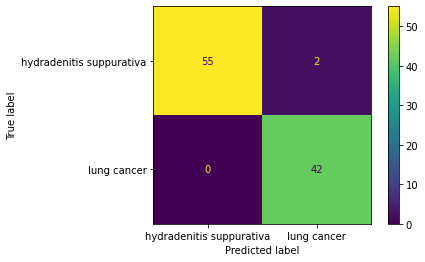

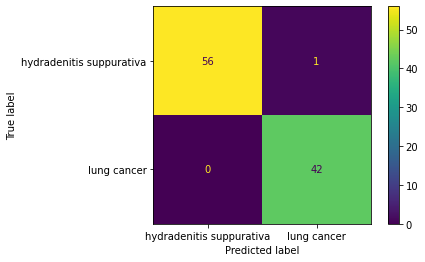

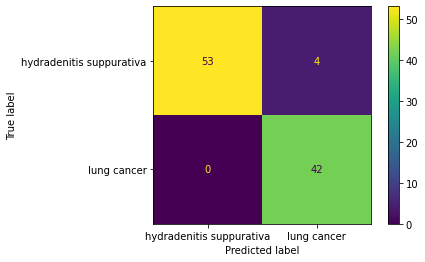

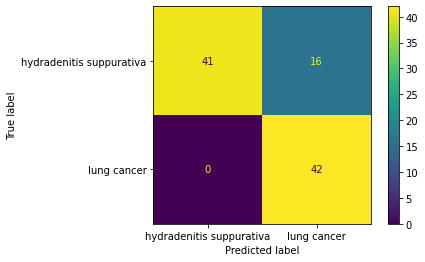

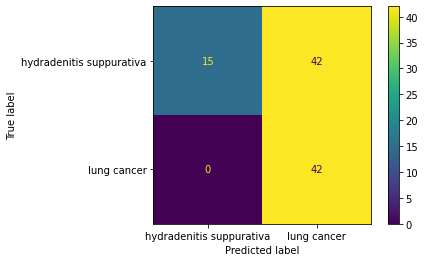

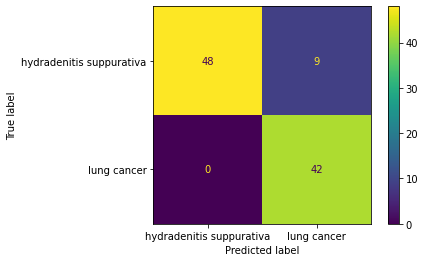

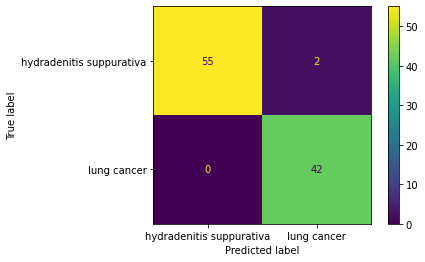

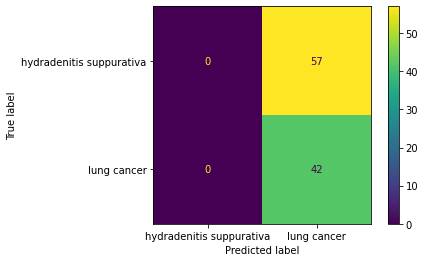

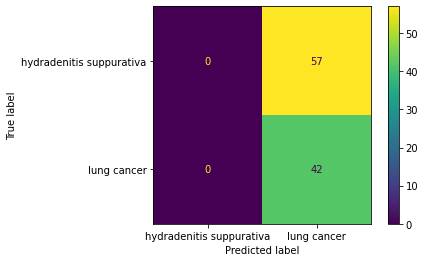

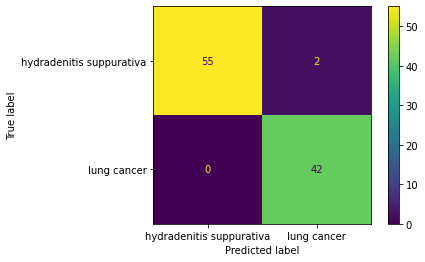

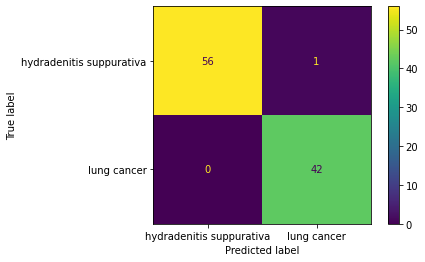

In [ ]:
for index, row in new_model_results_df.iterrows():
  row['conf matrices display'].plot()

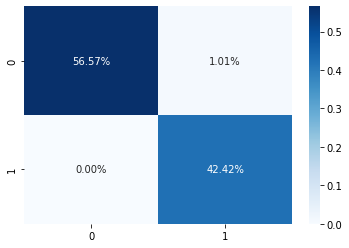

In [ ]:
cm = new_model_results_df['conf matrices'][1]
sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap='Blues')

# **Conclusions**

In [ ]:
new_model_results_df.iloc[: , :8].sort_values(by='best accuracy test', ascending=False)

,term type,model,measure,max measure,max features,best params,best accuracy train,best accuracy test
41,3 - word,MLPClassifier(),accuracy,0.909091,10000,"{'activation': 'logistic', 'alpha': 0.01, 'ear...",0.9898,0.9899
13,1 - word,MLPClassifier(),accuracy,0.858586,6000,"{'activation': 'tanh', 'alpha': 0.001, 'early_...",0.9898,0.9899
29,3 - word,LogisticRegression(),accuracy,0.828283,8000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9898,0.9899
32,3 - word,DecisionTreeClassifier(),accuracy,0.757576,8000,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.9898,0.9899
27,2 - word,MLPClassifier(),accuracy,0.898990,10000,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",0.9898,0.9899
5,1 - word,"(DecisionTreeClassifier(max_features='auto', r...",accuracy,0.818182,8000,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9898,0.9899
1,1 - word,LogisticRegression(),accuracy,0.838384,4000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9898,0.9899
26,2 - word,"VotingClassifier(estimators=[('LR', LogisticRe...",accuracy,0.898990,3000,"{'n_jobs': -1, 'voting': 'hard'}",0.9864,0.9798
17,2 - word,SVC(),accuracy,0.848485,4000,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.9763,0.9798
16,2 - word,MultinomialNB(),accuracy,0.909091,2000,"{'alpha': 0.1, 'fit_prior': True}",0.9831,0.9798


In [ ]:
t2 = time.perf_counter()
print('Seconds taken to run:', round(t2-t1, 0))
print('Minutes taken to run:', round((t2-t1)/60, 0))
print('Hours taken to run:', round((t2-t1)/3600, 2))

Seconds taken to run: 2182.0
Minutes taken to run: 36.0
Hours taken to run: 0.61


## **Conclusions**:

Feature Selection:
*   Most of the models did well with not more than 6000 features. many with 10000.
*   Best model - MLP. also MNB.
*   Worse model - AdaBoost.
*   Max accuracy - 90%. worse from notebook #2

Parameter Tuning:

*   Best model is still MLP. LR, DT, RF.
*   Max accuracy - 98.99%. Max F1 - 98.99%
*   param tuning improved a lot.


**Generally - Under Sampling has a big improvment potential on the data.




